In [1]:
!git clone https://github.com/PranavRao25/Temporal_Chatbot.git

/bin/bash: line 1: git: command not found


In [2]:
!pip --version

pip 23.3.1 from /opt/conda/lib/python3.10/site-packages/pip (python 3.10)


In [3]:
!pip install langgraph

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement langgraph (from versions: none)
ERROR: No matching distribution found for langgraph


In [5]:
import langgraph

ModuleNotFoundError: No module named 'langgraph'

In [6]:
import json

In [7]:
with open('temporal_graph_data.json','r') as f:
    graph_data = json.load(f)

In [8]:
graph_data

{'woke up': [420,
  600,
  660,
  300,
  600,
  360,
  420,
  360,
  420,
  540,
  540,
  420,
  660,
  480,
  300,
  300,
  300,
  300,
  360,
  300,
  360,
  480,
  600,
  360,
  480,
  300,
  420,
  300,
  540,
  300,
  600,
  540,
  360,
  420,
  300,
  300,
  360,
  420,
  480,
  480,
  420,
  360,
  480,
  660,
  300,
  900,
  300,
  300,
  360,
  300,
  360,
  420,
  420,
  360,
  300,
  480,
  540,
  600,
  300,
  480,
  480,
  360,
  480,
  360,
  420,
  300,
  360,
  300,
  360,
  300,
  300,
  0,
  300,
  480,
  480,
  360,
  480,
  360,
  660,
  300,
  360,
  360,
  360,
  600,
  600,
  300,
  600,
  600,
  360,
  300,
  540,
  300,
  420,
  480,
  420,
  360,
  300,
  360,
  540,
  300,
  540,
  300,
  360,
  300,
  360,
  420,
  300,
  300,
  300,
  300,
  480,
  420,
  360,
  300,
  540,
  300,
  780,
  420,
  360,
  300,
  300,
  540,
  540,
  420,
  360,
  540,
  420,
  300,
  300,
  300,
  780,
  300,
  300,
  300,
  300,
  360,
  600,
  540,
  300,
  420,
  300,
  36

In [9]:
import transformers

In [12]:
events = list(graph_data.keys())

each event either has a timepoint or (start_time, end_time, duration)

In [14]:
temp_data = dict()

In [16]:
import numpy as np

In [19]:
np.floor(np.average([1,2,3]))

2.0

In [44]:
time_values = [
    sorted([
        time_value
        for time_value in graph_data[event]
        if isinstance(time_value, int)
    ])
    for event in graph_data
]

In [48]:
import matplotlib.pyplot as plt

(array([ 18.,   0., 350., 215., 248., 127.,  23.,  11.,   5.,   3.]),
 array([   0.,  102.,  204.,  306.,  408.,  510.,  612.,  714.,  816.,
         918., 1020.]),
 <BarContainer object of 10 artists>)

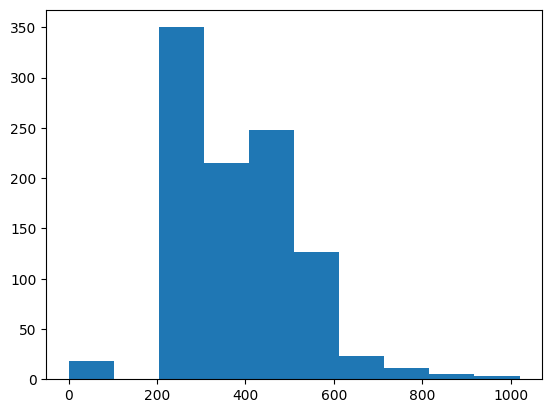

In [50]:
plt.hist(time_values[0])

In [40]:
for event in graph_data:
    time_points_avg_acc = []
    time_durations_avg_acc = []
    time_min_acc = []
        
    for time_values in graph_data[event]:
        if isinstance(time_values, list):
            time_interval_acc.append(time_values)
            time_points_acc.append(np.floor(np.average(time_values[:2])))
            time_durations_acc.append(time_values[2])
        else:
            time_points_acc.append(time_values)
            
    time_point_acc = np.floor(np.average(time_points_acc))
    time_duration_acc = np.floor(np.average(time_durations_acc)) if time_durations_acc!=[] else []
    temp_data[event] = [time_point_acc, time_duration_acc]

In [63]:
l = [1,2,3,4,5,6,7,8,9,0]

In [85]:
def seq_summary_values(l):
    a,s = np.average(l),np.std(l)
    k = [d for d in l if np.absolute(d-a)<s]
    m,n = (min(k),max(k)) if k != [] else (min(l),max(l))
    return m,a,n

In [86]:
for event in graph_data:
    time_points_acc = []
    time_durations_acc = []
    for time_value in graph_data[event]:
        if isinstance(time_value, int):
            time_points_acc.append(time_value)
        else:
            time_durations_acc.append(time_value[2])
            time_points_acc.append(np.floor(np.average(time_value[:2])))
    else:
        if time_points_acc == []:
            time_points_acc = [0]
        if time_durations_acc == []:
            time_durations_acc = [0]
    
    k1 = seq_summary_values(time_points_acc)
    k2 = seq_summary_values(time_durations_acc)
    temp_data[event] = [k1,k2]

In [87]:
temp_data

{'woke up': [(300, 395.1, 480), (0, 0.0, 0)],
 'saw Susan driving to the water park': [(540.0, 768.75, 1110.0),
  (60, 248.57142857142858, 240)],
 'saw Susan buying clothes': [(330.0, 620.0, 840.0), (60, 200.0, 120)],
 'saw Susan taking photos': [(720.0, 837.2727272727273, 1080),
  (120, 233.33333333333334, 360)],
 'saw Susan buying lunch': [(810.0, 865.0, 1110.0), (60, 130.0, 180)],
 'saw Susan reading at the library': [(390.0, 730.0, 1050.0),
  (60, 200.0, 240)],
 'was closed after': [(1140, 1221.3490725126476, 1320), (0, 0.0, 0)],
 'saw Emily waiting at the train station': [(510.0, 765.0, 930.0),
  (60, 228.0, 300)],
 'saw Emily fixing': [(810.0, 765.0, 870.0), (60, 210.0, 180)],
 'saw Emily walking towards the Statue': [(540.0, 780.0, 600.0),
  (240, 360.0, 480)],
 'saw Susan buying cookies': [(750.0, 996.0, 1140.0), (120, 150.0, 180)],
 'saw Susan working at the office': [(930.0, 915.0, 990.0), (60, 60.0, 60)],
 'saw Susan walking towards the Statue': [(1050.0, 1030.0, 1050.0),
  

In [89]:
with open("temp_temporal_graph_data.json","w") as f:
    json.dump(temp_data, f)

In [90]:
from py_heideltime import heideltime

text = "Thurs August 31st - News today that they are beginning to evacuate the London children tomorrow. Percy is a billeting officer. I can't see that they will be much safer here."

timexs = heideltime(
    text,
    language='English',
    document_type='news',
    dct='1939-08-31'
)

print(timexs)

/bin/sh: 1: java: not found


IndexError: list index out of range

In [4]:
import json

In [5]:
with open('temp_temporal_graph_data.json', 'r') as f:
    data = json.load(f)

In [6]:
data

{'woke up': [[300, 395.1, 480], [0, 0.0, 0]],
 'saw Susan driving to the water park': [[540.0, 768.75, 1110.0],
  [60, 248.57142857142858, 240]],
 'saw Susan buying clothes': [[330.0, 620.0, 840.0], [60, 200.0, 120]],
 'saw Susan taking photos': [[720.0, 837.2727272727273, 1080],
  [120, 233.33333333333334, 360]],
 'saw Susan buying lunch': [[810.0, 865.0, 1110.0], [60, 130.0, 180]],
 'saw Susan reading at the library': [[390.0, 730.0, 1050.0],
  [60, 200.0, 240]],
 'was closed after': [[1140, 1221.3490725126476, 1320], [0, 0.0, 0]],
 'saw Emily waiting at the train station': [[510.0, 765.0, 930.0],
  [60, 228.0, 300]],
 'saw Emily fixing': [[810.0, 765.0, 870.0], [60, 210.0, 180]],
 'saw Emily walking towards the Statue': [[540.0, 780.0, 600.0],
  [240, 360.0, 480]],
 'saw Susan buying cookies': [[750.0, 996.0, 1140.0], [120, 150.0, 180]],
 'saw Susan working at the office': [[930.0, 915.0, 990.0], [60, 60.0, 60]],
 'saw Susan walking towards the Statue': [[1050.0, 1030.0, 1050.0],
  

In [7]:
with open('temporal_graph_data.json', 'r') as k:
    data1 = json.load(k)

In [8]:
data1

{'woke up': [420,
  600,
  660,
  300,
  600,
  360,
  420,
  360,
  420,
  540,
  540,
  420,
  660,
  480,
  300,
  300,
  300,
  300,
  360,
  300,
  360,
  480,
  600,
  360,
  480,
  300,
  420,
  300,
  540,
  300,
  600,
  540,
  360,
  420,
  300,
  300,
  360,
  420,
  480,
  480,
  420,
  360,
  480,
  660,
  300,
  900,
  300,
  300,
  360,
  300,
  360,
  420,
  420,
  360,
  300,
  480,
  540,
  600,
  300,
  480,
  480,
  360,
  480,
  360,
  420,
  300,
  360,
  300,
  360,
  300,
  300,
  0,
  300,
  480,
  480,
  360,
  480,
  360,
  660,
  300,
  360,
  360,
  360,
  600,
  600,
  300,
  600,
  600,
  360,
  300,
  540,
  300,
  420,
  480,
  420,
  360,
  300,
  360,
  540,
  300,
  540,
  300,
  360,
  300,
  360,
  420,
  300,
  300,
  300,
  300,
  480,
  420,
  360,
  300,
  540,
  300,
  780,
  420,
  360,
  300,
  300,
  540,
  540,
  420,
  360,
  540,
  420,
  300,
  300,
  300,
  780,
  300,
  300,
  300,
  300,
  360,
  600,
  540,
  300,
  420,
  300,
  36